# Differensiallikninger og fartslover

```{admonition} Læringsutbytte
Etter å ha arbeidet med dette temaet, skal du kunne:
1. Forklare hva som menes med differensiallikninger, og hvordan slike likninger kan brukes til å modellere ulike systemer.
2. Forklare og implementer Eulers metode (Forward Euler).
3. Løse ordinære differensiallikninger med egne Python-funksjoner og funksjoner fra Scipy-biblioteket.
4. Løse ratelover numerisk.
```

## Motivasjon
Eksperimenter har stått i sentrum av kjemifaget i flere hundre år. Men med økende datakraft og billigere datamaskiner de siste 50 årene har simuleringer blitt et viktig tillegg til dette. Simuleringer kan belyse og supplere eksperimenter, i tillegg til at de kan illustrere viktige fenomener på egen hånd. Ved å studere molekyler og kjemiske reaksjoner med datamaskiner, kan vi få enda større innsikt i de mest fundamentale egenskapene og mekanismene til disse systemene.

Her skal vi se på metoder for modellering med differensiallikninger, spesielt anvendt på kjemiske ratelover.

## Differensiallikninger og Eulers metode
La oss si at vi har et uttrykk for endringen i et system, for eksempler endring i konsentrasjon (fartslover/ratelover) eller endring i posisjon og hastighet (Newtons 2. lov). Disse uttrykkene beskriver den momentane endringen, det vil si den deriverte, som funksjon av tid. De er derfor _differensiallikninger_.

Eksempler på differensiallikninger er:

$$f'(x) - x = 2$$

$$y' = y$$

$$y' = x - y$$

$$u' = t + 1$$

$$u'(t) = u(t)$$

Alle disse er differensiallikner som er skrevet med litt ulike notasjoner. Felles for dem er at de inneholder den deriverte som funksjon av en eller annen variabel. Det kan være nyttig å kalle venstresida av likningen, altså den deriverte, for $u'(t)$ eller $y'$. På høyresida kan det være ulike variabler og konstanter, men det vanligste er at vi har en variabel og den integrerte funksjonen, $u(t)$ eller $y$. Vi kan derfor skrive høyresida som en funksjon av $t$ og $y$ eller $t$ og $u(t)$. To vanlige måter å skrive generelle differensiallikninger på, er derfor:

$$y' = f(t,y)$$

$$u'(t) = f(t,u(t))$$

```{admonition} Underveisoppgave
:class: tip
Studer differensiallikningene og de generelle uttrykkene og prøv å forstå sammenhengen mellom dem.
```

Et praktisk eksempel på en differensiallikning er Newtons 2. lov. Dersom summen av kreftene på ei kule som faller er $\sum F = G - L$, får vi:

$\sum F = ma(t)$

$a(t) = \frac{\sum F}{m}$

$a(t) = \frac{G}{m} - \frac{L}{m}$

$a(t) = \frac{mg}{m} - \frac{kv(t)}{m}$

$v'(t) = g - \frac{kv(t)}{m}$

Her ser vi at den siste likningen inneholder den deriverte av farten (altså akselerasjonen). Altså er dette en differensiallikning.

```{admonition} Differensiallikninger
En differensiallikning er en likning som inneholder den deriverte av en funksjon. I de fleste praktiske situasjoner beskriver slike likninger sammenhengen mellom endringen, $f'(t)$, og tilstanden, $f(t)$, til et system ved tida $t$.
```
Det vil altså si at en difflikning er en sammenheng mellom den deriverte til en funksjon, altså endringen i funksjonen, og funksjonen selv. Når vi løser en difflikning, får vi ikke et uttrykk for $x$, som når vi løser likninger – vi får et uttrykk for $f(x)$. Et enkelt eksempel på dette er:

$f'(x) = 1$

Hva slags funksjon kan være løsningen på en slik likning? Vi veit at å integrere er det motsatte av å derivere. Derfor kan vi jo integrere på begge sider av likningen for å finne $f(x)$:


$$\int f'(x) dx = \int 1\ dx$$

$$f(x) = x + C$$

Siden den deriverte av _x_ er 1, må integralet av 1 være _x_. Men den deriverte av for eksempel $x + 2$ eller $x + 10$ er jo også _1_, så derfor må vi legge til en vilkårlig konstant _C_ som viser at det er flere, ja faktisk uendelig, funksjoner som blir 1 når vi deriverer dem. Dette er fordi integralene er _ubestemte_, det vil si at vi ikke integrerer fra og til en verdi, slik som vi har gjort tidligere.

Med andre ord har vi ofte svært mange eller uendelig mange løsninger av en difflikning. Men i praksis er ofte konstanten bestemt av noen rammebetingelser som vi skal se på, og da får vi ofte én løsning. Denne rammebetingelsen består av en startverdi for $f(x)$, det vil si $f(x_0)$ eller $y_0$, som igjen bestemmer hvilken konstant vi får når vi integrerer. Dersom vi har disse initialbetingelsene, kan vi finne neste funksjonsverdi ved å løse en differensiallikning. La oss se på en enkel metode å gjøre dette på.

## Eulers metode
Vi har altså en startverdi $f(x_0)$ og ønsker å finne $f(x_0 + dx)$, altså neste funksjonsverdi. I tillegg har vi et uttrykk for den deriverte av funksjonen, nemlig differensiallikningen. Du kjenner faktisk allerede til et uttrykk som inneholder en funksjon og dens deriverte, nemlig definisjonen av den deriverte. La oss bruke den til å utlede en metode for å finne $f(x + dx)$. Vi bruker den numeriske definisjonen der vi tilnærmer grenseverdiene med en _dx_ ($\Delta x$) som er så liten som mulig:

$$f'(x) \approx \frac{f(x+dx) - f(x)}{dx}$$

Til å begynne med kjenner vi $f(x)$, altså $f(x_0)$. Dette er initialbetingelsen, for eksempel startkonsentrasjonen $c(t_0)$ i eksempelet ovenfor. Vi kjenner også et uttrykk for den deriverte, nemlig differensiallikningen. I tillegg bestemmer vi selv tidssteget _dx_, men husk at det verken bør være for lite eller for stort. Den eneste ukjente i den numeriske tilnærmingen til den deriverte er altså $f(x+dx)$. Det er jo nettopp $f(x+dx)$ vi prøver å finne, fordi det beskriver tilstanden til systemet ved neste tidssteg. Med litt enkel algebra får vi omformet uttrykket slik at det blir et uttrykk for $f(x+dx)$. Vi ganger først med $dx$ på begge sider:

$$f'(x)\cdot dx \approx f(x+dx) - f(x)$$

Deretter får vi $f(x+dx)$ aleine på høyre side og ender opp med følgende likning:

$$f(x+dx) \approx f(x) + f'(x)\cdot dx$$

Dette er _Eulers metode_, eller nærmere bestemt _Forward Euler_. Metoden kalles dette fordi den tar utgangspunkt i framoverdifferansen til den deriverte. Den  brukes til å løse differensiallikninger, det vil si å _integrere_ den deriverte slik at vi finner funksjonsverdiene. Siden vi ofte har å gjøre med funksjoner som varierer med tid, kaller vi gjerne _dx_ for _dt_.

```{admonition} Eulers metode (Forward Euler)
Vi kan finne funksjonsverdiene $f(t_{k+1})$ ved å bruke funksjonsverdien $f(t_k)$ og den deriverte av funksjonen ved tida $t_k$, $f'(t_k)$ sammen med en steglengde $dt$ som representerer en liten $\Delta t$.

$$f(t_{k+1}) = f(t_k) + f'(t_k)\cdot dt$$
```

### Implementering
Vi starter med et enkelt eksempel, nemlig den enkle differensiallikningen vi så på ovenfor, $f'(x) = 1$. En vanlig måte å skrive dette på er $y' = 1$. Vi lager oss derfor en funksjon som kan inneholde både $x$ og $y$. Vi kan plotte denne for ulike initialbetingelser. En måte å gjøre dette på er slik:

1. Definer hvilke verdier vi skal evaluere funksjonen i, altså et intervall $[x_0, x_{slutt}]$. Husk at vi bare kan derivere og integrere numerisk i bestemte _punkter_. Vi får altså ikke funksjoner når vi integrerer en differensiallikning – vi får funksjonsverdier.
2. Sett en steglengde som spesifiserer avstanden mellom _x_-punktene. Ut fra dette regner du ut antall ganger løkka skal gå, altså antall funksjonsverdier vi skal finne. Dette regner vi ut ved å ta differansen mellom $x_0$ og $x_{slutt}$, som vi dividerer på steglengden $dx$. Da får vi antall intervaller mellom $x_0$ og $x_{slutt}$ med avstand $dx$. For å finne antall punkter, må vi derfor ta antall intervaller og legge til 1: 

$N_{punkter} = \frac{x_{slutt} - x_0}{dx} + 1$

3. Vi definerer så differensiallikningen som en funksjon og lager arrayer $x$ og $y$ for å spare på verdiene vi regner ut. Vi fyller inn initalbetingelsene inn i disse arrayene.
4. Nå kan vi bruke Eulers metode til å løse differensiallikningen.

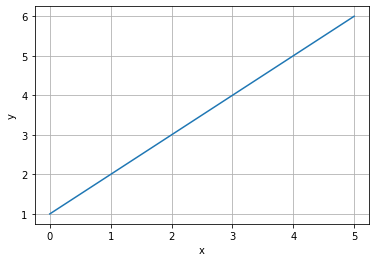

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Plotteverdier
x0 = 0                         # startverdi for x
x_slutt = 5.0                  # sluttverdi for x
dx = 1E-5                      # steglengde
N = int((x_slutt - x0)/dx) + 1 # antall punkter

# Initialbetingelser
y0 = 1                  # intitialbetingelse for y

# Differensiallikningen
def yder(y,x):
    return 1 

# Lager arrayer for å spare på verdiene
x = np.zeros(N)
y = np.zeros(N)
y[0] = y0     # Legger inn initalbetingelsen for y
x[0] = x0

# Eulers metode
for i in range(N-1):
    y[i+1] = y[i] + yder(y[i],x[i])*dx
    x[i+1] = x[i] + dx

plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

```{admonition} Underveisoppgave
:class: tip
Studer programmet ovenfor og regn ut løkka for hånd med fra $x = 0$ til $x = 5$ med steglengde $dx = 1$.
```

Dersom vi endrer initialbetingelsene, får vi naturlig nok andre løsninger:

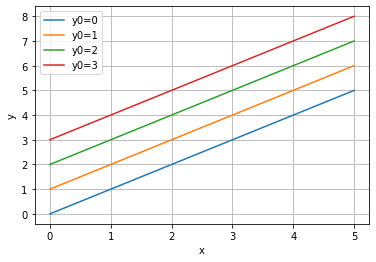

In [12]:
# Plotteverdier
x0 = 0                         # startverdi for x
x_slutt = 5.0                  # sluttverdi for x
dx = 1E-3                      # steglengde
N = int((x_slutt - x0)/dx) + 1 # antall punkter

# Initialbetingelser
y0 = 1                  # intitialbetingelse for y

# Differensiallikningen
def yder(y,x):
    return 1 

# Lager arrayer for å spare på verdiene
x = np.zeros(N)
y = np.zeros(N)
x[0] = x0

y_liste = [0, 1, 2, 3]
for y0 in y_liste:
    y[0] = y0 
    for i in range(N-1):
        y[i+1] = y[i] + yder(y[i],x[i])*dx
        x[i+1] = x[i] + dx
    plt.plot(x,y,label=f"y0={y0}")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Det er enkelt å se at funksjonene vi får ovenfor er $y = x + C$, der $C$ avhenger av initialbetingelsene. Vi får derimot ikke selve funksjonsuttrykket som output, men vi får, som nevnt før, _funksjonsverdiene_. Vi kan også løse likningen $y' = y + x$ på samme måte. Den analytiske løsningen for denne likningen er $y = Ce^x - x - 1$. Resultatene blir da slik for de samme initialbetingelsene som ovenfor:

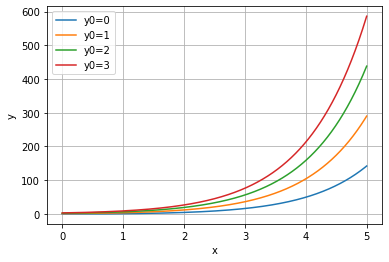

In [13]:
def yder(y,x):
    return y + x

y_liste = [0, 1, 2, 3]
for y0 in y_liste:
    y[0] = y0 
    for i in range(N-1):
        y[i+1] = y[i] + yder(y[i],x[i])*dx
        x[i+1] = x[i] + dx
    plt.plot(x,y,label=f"y0={y0}")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

```{admonition} Underveisoppgave
:class: tip
Løs differensiallikninga $y' + y^3 = \sin(x)$ med Eulers metode fra $x = 0$ til $x = 10$. Bruk initialbetingelsen $y(0) = 0$. Vær nøye med hvordan du definerer funksjonen.
```


## Newtons 2. lov

Vi så at Newtons 2. lov gir oss differensiallikninger når vi omformulerer akselerasjonen som den deriverte av farten.

$$a(t) = v'(t) = s''(t)$$

Vi kan altså få både en førsteordens og en andreordens difflikning ut av Newtons 2. lov. Det betyr også at vi kan finne akselerasjon og fart ut fra strekning ved å derivere, og motsatt finne fart og posisjon fra akselerasjon ved å integrere. Vi kan med andre ord skrive Newtons 2. lov slik:

$$F = ma(t) = mv'(t) = ms''(t)$$

La oss ta et eksempel. Når vi slipper ei kule fra en viss høyde, kan vi regne med at to krefter virker på kula: tyngdekraften og luftmotstand. For en lett ball som faller, kan vi si at summen av krefter er summen av gravitasjonskraften og luftmotstanden i $y$-retning på en graf. Vi definerer positiv retning oppover $y$-aksen.

$$\sum F = G - L = ma(t) = mv'(t) = ms''(t)$$

Vi ser at vi nå har den deriverte av hastigheten, som er akselerasjonen. For å kunne løse denne likningen, må vi finne ut hva summen av kreftene er. Du husker kanskje at $G = mg$, og at en mulig modell for luftmotstand er $L = -kv$, der $k$ er en konstant som blant annet er avhengig av legemets form. Da kan vi skrive uttrykket slik:

$$ma(t) = - mg + (- kv(t))$$

$$a(t) = \frac{- mg - kv(t)}{m} = - g - \frac{kv(t)}{m}$$

Dette er en førsteordens difflikning der vi har en funksjon $v(t)$, og dens deriverte $a(t)$ (det vil si $v'(t)$). La oss løse denne numerisk.

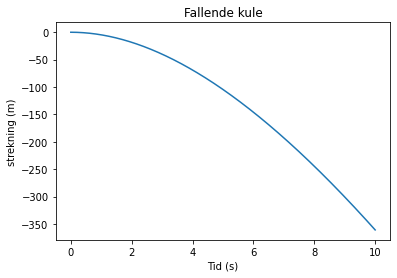

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Konstanter
k = 0.1   # Luftmotstand
g = 9.81  # Tyngdeakselerasjon i m/s^2
m = 1     # Masse i kg
v0 = 0    # Starthastighet i m/s
s0 = 0    # Startposisjon i m

# Tidsvariabler
dt = 1E-5 # Tidsintervall i s
tid_start = 0
tid_slutt = 10
N = int((tid_slutt-tid_start)/dt) + 1 # Antall punkter

# Arrayer
t = np.zeros(N)
a = np.zeros(N)
v = np.zeros(N)
s = np.zeros(N)

# Startverdier
t[0] = tid_start
v[0] = v0
s[0] = s0

for i in range(N-1):
    a[i] = - g - k*v[i]/m
    v[i+1] = v[i] + a[i]*dt
    s[i+1] = s[i] + v[i]*dt + 0.5*a[i]*dt**2
    t[i+1] = t[i] + dt

plt.plot(t,s)
plt.title('Fallende kule')
plt.xlabel('Tid (s)')
plt.ylabel('strekning (m)')
plt.show()

```{admonition} Underveisoppgave
:class: tip
Studer programmet ovenfor og forklar hvordan det fungerer linje for linje.
```

### Newtons 2. lov i kjemi
Du tenker kanskje at Newtons lover kun benyttes i fysikk? Det er ikke tilfellet. Newtons 2. lov benyttes i tilfeller der vi kan beskrive partikler med klassisk mekanikk. Vi bruker loven til å finne akselerasjonen, og dermed hastighet og posisjon, til partikler gitt kreftene mellom dem (svake bindinger). Ovenfor brukte vi et enkelt eksempel med en fallende kule, men eksempelet kan utvides til helt andre tilfeller der kreftene er noe annet enn gravitasjon og luftmotstand. Når vi bruker Newtons 2. lov til å regne ut bevegelsen til atomer og molekyler, bruker vi en simuleringsmetode som kalles _molekyldynamikk_.

La oss se på et enkelt eksempel der vi bruker en enkel modell for å beskrive vibrasjonen i en binding mellom to like atomer (for eksempel $O_2$). Vi kan lage bindingsmodeller som enkle "fjærmodeller". Da ser vi på atomene som kuler som henger i hver sin ende av en fjær. Dersom bindingen er stiv (høy "fjærkonstant"), vibrerer atomene mye, og motsatt. Enkle fjærkrefter følger Hooks lov:

$$F = -k\cdot (x - x_0)$$

der _x_ er posisjonen og $x_0$ er likevektsposisjonen, altså posisjonen der fjæra ikke er komprimert eller strukket ut. Fjærkonstanten _k_ beskriver stivheten til fjæra. Vi kan finne _k_ for ulike bindinger eksperimentelt eller ved hjelp av datasimuleringer.

La oss se på et program som simulerer konseptet bak bindingsvibrasjon. Vi lar en kule stå i ro og beskriver kun hvordan den andre kula beveger seg fram og tilbake. Vi velger enkle verdier for $m$, $k$, $x0$ og $t$, slik at vi får illustrert konseptet enklere. For atomer vil selvsagt disse verdiene være svært mye lavere!

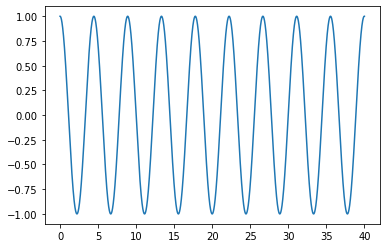

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Konstanter og variabler
m = 1    # Masse i kg
k = 2    # Fjærkonstant
x_eq = 0 # Likevektsposisjon i m
v0 = 0   # Startfart i m/s
x0 = 1   # Startposisjon i m

# Tidssteg
dt = 1E-6
tid = 40        # Tid i s
N = int(tid/dt) # Intervaller

# Initialisering
v = np.zeros(N+1)
x = np.zeros(N+1)
t = np.zeros(N+1)

v[0] = v0
x[0] = x0

# Integrasjonsløkke
for i in range(N):
    a = -k/m*(x[i]-x_eq)
    # Eulers metode
    v[i+1] = v[i] + a*dt
    x[i+1] = x[i] + v[i]*dt
    t[i+1] = t[i] + dt
    
plt.plot(t,x)
plt.show()

```{admonition} Underveisoppgave
:class: tip
Studer programmet ovenfor og forklar hvordan det fungerer linje for linje.
```

## Fartslover (ratelover)
Fartslover i kjemi er eksempler på differensiallikninger. La oss ta endring i konsentrasjon i reaksjonen mellom hydrogengass og jod i gassfase som et eksempel. Denne reaksjonen har en relativt enkel ratelov. Husk at formen på ratelovene ikke har noen direkte sammenheng med det støkiometriske forholdet mellom reaktanter og produkter. De er derimot basert på empiriske observasjoner (eksperimenter). Reaksjonen er egentlig reversibel, men vi forenkler og beskriver den kun i én retning til å begynne med. Reaksjonslikningen for reaksjonen kan da skrives slik:

$$H_2 (g) + I_2 (g) \rightarrow 2HI (g)$$


Fartsloven for denne reaksjonen med hensyn på konsentrasjonen av $HI$ (her kalt _c_) er som følger:

$$c'(t) = k_r[H_2][I_2]$$

Vi har altså en likning som beskriver endringen i systemet $c'(t)$ (en differensiallikning), men ingen informasjon om selve konsentrasjonen $c(t)$. Vi ønsker med andre ord å finne konsentrasjonen av $HI$ ved enhver tid gitt en eller annen startbetingelse (konsentrasjonen av produkter og reaktanter til å begynne med). Det er det samme som å si at vi ønsker å finne funksjonsverdien $c(t + dt)$ for hvert tidssteg $dt$. 

Likningen ovenfor har i utgangspunkt tre ukjente, $[HI]_{t+dt}$, $[H]_{t+dt}$ og $[I]_{t+dt}$. Heldigvis er disse ukjente størrelsene avhengige av hverandre. Det er fordi alle tar utgangspunkt i den samme rateloven for $[HI]$ fordi de er støkiometrisk ekvivalente (forsvinner 1 mol $H_2$, dannes 2 mol $HI$, og det brukes 1 mol $I_2$ osv.). De tre ratelovene kan vi derfor formulere slik:

$$[HI]'(t) = k_r[H_2][I_2]$$

$$[H_2]'(t) = -0.5 [HI]'(t) = -0.5 \cdot k_r[H_2][I_2]$$

$$[I_2]'(t) = [H_2]'(t) = -0.5\cdot k_r[H_2][I_2]$$

For en generell ratelov som løses med Forward Euler, har vi at:

$$c(t+dt) \approx c(t) + c'(t)\cdot dt$$

Fartslover er koblede differensiallikninger, det vil si at de avhenger av hverandre. Derfor kan det være litt mer å huske på når vi løser farstlover enn når vi for eksempel løser Newtons 2. lov. Her er et eksempel som simulerer utviklingen av $H_2$, $I_2$ og $HI$ over 500 sekunder:

```{admonition} Underveisoppgave
:class: tip
Forklar hva som skjer i programmet nedenfor og fyll inn det som mangler (Eulers metode).
```

````{admonition} Løsningsforslag
:class: tip, dropdown
```{code-block} Python
for i in range(N-1):
    HIder = k*H[i]*I[i]
    Hder = -0.5*HIder
    Ider = Hder
    # Eulers metode
    HI[i+1] = HI[i] + HIder*dt
    H[i+1] = H[i] + Hder*dt
    I[i+1] = I[i] + Ider*dt
    t[i+1] = t[i] + dt
```
````

<iframe src="https://trinket.io/embed/python3/09d06157a6" width="100%" height="600" frameborder="0" marginwidth="0" marginheight="0" allowfullscreen></iframe>

Ofte kan det være lurt å gruppere kode i funksjoner slik at det er lettere å gjenbruke koden og fordi vi da har større kontroll på når vi gjør hver operasjon.

```{admonition} Underveisoppgave
:class: tip
Modifiser programmet ovenfor slik at du bruker en funksjon _forward\_euler(HI0, H20, I20, k, tid_slutt, h)_ til å integrere fartslovene.
```

````{admonition} Løsningsforslag
:class: tip, dropdown
```{code-block} Python
import numpy as np
import matplotlib.pyplot as plt 

# Difflikninger
def dHI(H,I,k):
    return k*H*I

def dH2(H,I,k):
    return -0.5*k*H*I

def dI2(H,I,k):
    return -0.5*k*H*I

#Forward Euler
def FE(HI0, H0, I0, k, tid_slutt, t0=0, h=1E-5):
    N = int((tid_slutt - t0)/h)
    HI = np.zeros(N+1)
    H = np.zeros(N+1)
    I = np.zeros(N+1)
    t = np.zeros(N+1)
    HI[0] = HI0
    H[0] = H0
    I[0] = I0
    t[0] = t0
    for i in range(N):
        HIder = dHI(H[i],I[i],k)
        Hder = -0.5*HIder
        Ider = Hder
        HI[i+1] = HI[i] + HIder*h
        H[i+1] = H[i] + Hder*h
        I[i+1] = I[i] + Ider*h
        t[i+1] = t[i] + h
    return HI, H, I, t

HI, H2, I2, t = FE(HI0=0, H0=1, I0=1, k = 4.84E-2, tid_slutt = 500)
plt.title('Reaksjonskinetikk for dannelse av HI')
plt.xlabel('tid (s)')
plt.ylabel('Konsentrasjon (mol/L)')
plt.plot(t, HI, label = 'HI')
plt.plot(t, H2, label = 'H2')
plt.show()
```
````

Ved høye temperaturer vil flere og flere HI-molekyler kollidere og rives løs igjen til $I_2$ og $H_2$. Reaksjonen er derfor egentlig reversibel, selv om vi har gjort en forenkling og beskrevet den som irreversibel ovenfor. Det viser seg at den motsatte reaksjonen følger denne rateloven:

$$c'(t) = k_{bakover}[HI]^2$$

Reaksjonen er altså andreordens med hensyn på konsentrasjonen av hydrogenjodid. Den totale rateloven for hydrogenjodid blir derfor:

$$c'(t) = k_{framover}[H_2][I_2] - k_{bakover}[HI]^2$$

Dersom vi kjenner likevektskonstanten $K$ ved den gitte temperaturen, kan vi finne $k_{bakover}$ ved å benytte følgende sammenheng:

$$K = \frac{k_{framover}}{k_{bakover}}$$


```{admonition} Underveisoppgave
:class: tip
Lag et program som simulerer reaksjonen mellom $I_2$ og $H_2$ ved 450$^\circ$C. Sett likevektskontstanten til å være 10 og $k_{framover}$ til å være $4.8\cdot 10^{-2}$. Lag et plott som viser konsentrasjonen som funksjon av tid, og et plott som viser reaksjonsfarten som funksjon av tid. Kommenter plottene. Stemmer dette med det du kan om likevekter?
```

````{admonition} Løsningsforslag
:class: tip, dropdown
```{code-block} Python
import numpy as np
import matplotlib.pyplot as plt

#Initialbetingelser

H0 = 1          # Konsentrasjon av hydrogengass i mol/L    
I0 = 1          # Konsentrasjon av jodgass i mol/L
HI0 = 0         # Konsentrasjon av hydrogenjodid i mol/L
k_f = 4.84E-2   # Ratekonstanten forover
K = 10          # Omtrentlig likevektskonstant ved 400 grader
k_b = k_f/K     # K = k_framover/k_bakover

#Tidssteg
tid_slutt = 250            # antall sekunder
t0 = 0                     # starttid
dt = 1E-3                  # tidsintervallet
N = int((tid_slutt-t0)/dt) # antall punkter

HI = np.zeros(N)
H = np.zeros(N)
I = np.zeros(N)
t = np.zeros(N)

#Arrayer
t = np.zeros(N)        # Tid i sekunder
H = np.zeros(N)        # Konsentrasjon av H2
I = np.zeros(N)        # Konsentrasjon av I2
HI = np.zeros(N)       # Konsentrasjon av HI
Hder = np.zeros(N)     # Konsentrasjonsendring av H2
Ider = np.zeros(N)     # Konsentrasjonsendring av I2
HIder = np.zeros(N)    # Konsentrasjonsendring av HI
forlengsrate = np.zeros(N)
baklengsrate = np.zeros(N)

H[0] = H0
I[0] = I0
HI[0] = HI0

# Eulers metode
for i in range(N-1):
    forlengsrate[i] = k_f*H[i]
    baklengsrate[i] = k_b*HI[i]
    HIder[i] = forlengsrate[i] - baklengsrate[i]    # Rateloven for HI
    Hder[i] = - 0.5*HIder[i]        # Endringen i [H2]
    Ider[i] = Hder[i]               # Endringen i [I2]
    HI[i+1] = HI[i] + HIder[i]*dt
    H[i+1] = H[i] + Hder[i]*dt
    I[i+1] = I[i] + Ider[i]*dt
    t[i+1] = t[i] + dt

plt.title('Reaksjonsfart for dannelse av HI')
plt.xlabel('tid (s)')
plt.ylabel('Reaksjonsfart (mol/L)/s')
plt.plot(t[:-1], forlengsrate[:-1], label = 'H$_2$ + I$_2$ --> 2HI',color='green')
plt.plot(t[:-1], baklengsrate[:-1], label = '2HI --> H$_2$ + I$_2$',color='maroon')
plt.legend()
plt.grid()
plt.show()

plt.xlabel('tid (s)')
plt.ylabel('Konsentrasjon (mol/L)')
plt.plot(t, HI, label = 'Produkter',color='green')
plt.plot(t, H, label = 'Reaktanter',color='purple')
plt.legend()
plt.grid()
plt.show()
```
````

Når vi løser differensiallikninger, er det ikke alltid tilnærmingene er gode. Spesielt når vi har å gjøre med svingninger, gir Forward Euler ustabile og ofte helt feil resultater, spesielt med mindre $dt$ er svært liten. Og dersom $dt$ blir svært liten, får vi også et problem med veldig tunge beregninger. Det kan også bli et problem dersom vi ønsker å studere et system langt fram i tid. Forward Euler er derfor mer ment som en introduksjon til løsing av differensiallikninger, da metoden i seg selv ikke benyttes i stor grad. Vi skal nå se på et utvalg andre metoder.

## Backward Euler
Forskjellen på Forward Euler (FE) og Backward Euler (BE) er liten i teorien, men betydelig for implementering. FE regner ut funksjonsverdien ved tida $t+dt$ med utgangspunkt funksjonsverdien ved tida $t$ og den deriverte av funksjonen ved tida $t$. BE regner ut funksjonsverdien ved tida $t+dt$ med funksjonsverdien ved tida $t$ og den deriverte av funksjonen ved tida $t+dt$. Det er altså bare en forskjell i hvilken deriverte vi tar utgangspunkt i: FE tar utgangspunkt i framoverdifferansen av den deriverte, mens BE tar utgangspunkt i bakoverdifferansen. Dette ser ubetydelig ut, men det gir en ganske stor forskjell i hvordan vi implementerer metoden. 

Vi kaller Forward Euler for en _eksplisitt metode_ fordi vi finner tilstanden til et system ved et seinere tidspunkt ($t + dt$) ut fra endringen av systemet ved det nåværende tidspunktet ($f'(t)$). Backward Euler er derimot en _implisitt metode_ fordi vi finner tilstanden til et system ved et seinere tidspunkt ($t + dt$) ut fra endringen av systemet ved det samme tidspunktet ($f'(t + dt)$). Vi kan generalisere BE-metoden slik:

```{admonition}
Vi kan finne funksjonsverdiene $f(t_{k+1})$ ved å bruke funksjonsverdien $f(t_k)$ og den deriverte av funksjonen ved tida $t_{k+1}$.

$$f(t_{k+1}) = f(t_k) + f'(t_{k+1})\cdot dt$$

der dt = steglengden.
```

Implisitte metoder er gode på såkalte _stive_ differensiallikninger, det vil si likninger som er numerisk ustabile med mindre tidssteget er svært lite. Numerisk ustabile likninger gir løsninger med en betydelig feil som ofte akkumuleres over tid. BE gir også gode resultater med store tidssteg og egner seg derfor godt til simulering av systemer over lengre tidsintervaller, men den gir i utgangspunktet like store feil som FE med samme tidssteg. Den egner seg derfor best som introduksjon til implisitte metoder, og vi skal derfor ikke se på implementering av denne metoden her. Vi skal snart se på hvordan vi kan bruke implisitte metoder fra scipy-biblioteket til å løse stive differensiallikninger. Men før vi gjør det, skal vi kikke litt på en metode som er mye brukt til å løse differensiallikninger som ikke er stive, nemlig Runge-Kutta 4.

```{admonition} Underveisoppgave
:class: tip
Oppsummer hva som er forskjellene og likhetene mellom Forward Euler og Backward Euler, og hva som er forskjellen på en eksplisitt og en implisitt metode.
```

## Runge-Kutta 4
Forward Euler er en del av en større familie av numeriske metoder kalt _Runge-Kutta-metoder_. Disse metodene blei systematisert og utvikla av de tyske matematikerne Carl Runge og Martin Wilhelm Kutta på starten av 1900-tallet. En av de vanligste Runge-Kutta-metodene kalles _Runge-Kutta 4_ (RK4), og er en _fjerdeordens_ RK-metode. Med det menes det at en funksjon evalueres på fire ulike steder per funksjonsverdiestimat. Dette krever en del regnekraft, men RK4 er en svært mye brukt metode på grunn av algoritmens stabilitet og presisjon. Det er en eksplisitt metode på lik linje med FE, så for store tidssteg er den ikke så god på stive differensiallikninger. Eulers metode er den enkleste RK-metoden, og er av første orden (RK1). Vi kan generalisere RK4 slik:

````{admonition} Runge-Kutta 4
En differensiallikning $y' = f(t, y)$ kan løses gitt en initialbetingelse $y(t_0)$ og en steglengde $dt$ ved følgende metode:

for n = 0, 1, 2, 3, ..., N: 

$k_1 = f(t_n, y_n) \cdot dt$

$k_2 = f(t_n + \frac{dt}{2}, y_n + \frac{k_1}{2})\cdot dt$

$k_3 = f(t_n + \frac{dt}{2}, y_n + \frac{k_2}{2})\cdot dt$

$k_4 = f(t_n + dt, y_n + k_3)\cdot dt$

$y_{n+1} = y_n + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)$

$t_{n+1} = t_n + dt$
````

## ODE-løsere
Backward-metoder og Runge-Kutta-metoder av høyere orden er vanskelig å implementere. La oss se derfor se hvordan vi kan løse differensiallikninger med funksjoner fra scipy-biblioteket. De differensiallikningene vi har sett på, kaller vi for _ODE-er_ (ordinary differential equations) for å skille dem fra _PDE-er_ (partial differential equations). Vi skal ikke se på partielle differensiallikninger her, men mange av prinsippene for å løse dem er like som for ODE-er. Vi kommer til å bruke ODE som forkortelse videre.

Vi starter med enkle differensiallikninger for å illustrere de grunnleggende prinsippene. En enkel differensiallikning vi kan begynne med, er:

$$y' = t - y$$

Vi kan skrive høyresida her som $f(t,y)$, siden den kan beskrives som en funksjon av _t_ og _y_. Deretter kan vi implementere en løser ved hjelp av en funksjon som heter _solve\_ivp_ ("solve initial value problem").

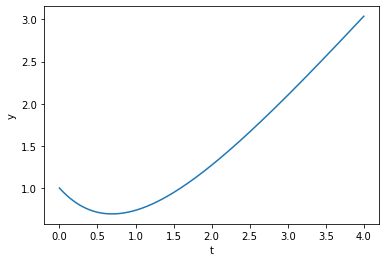

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def dy_dt(t, y):
    return t - y

a = 0
b = 4
t = np.linspace(a,b,1000)
y0 = 1
y_int = solve_ivp(dy_dt, [a,b], [1], t_eval=t)

plt.xlabel("t")
plt.ylabel("y")
plt.plot(y_int.t, y_int.y[0])

plt.show()

Vi definerer her et sett med t-verdier slik at vi får et intervall å integrere over. Dernest er det viktig å ha en startbetingelse for $y$ (husk: vi trenger den forrige $y$-verdien for å finne den neste). Funksjonen _solve\_ivp_ er en generell løser for differensiallikninger og tar som første parameter en funksjon av typen $f(t,y)$ – legg merke til rekkefølgen på parameterne. Deretter legger vi inn tidsintervallet som vi skal integrere over. Dette legges inn som en liste.

Etter tidsintervallet legges startbetingelsene inn. Siden _solve\_ivp_ er en løser som kan løse systemer av differensiallikninger, må vi lage startbetingelsen som en liste. Deretter har vi en del valgfrie parametre. Vi har brukt parameteren _t\_eval_ her fordi den sier hvilke $t$-verdier vi skal regne ut $y$-verdier for. Hvis vi ikke gjør dette, får vi integralet kun evaluert i noen få punkter. Det kan være greit hvis vi for eksempel bare ønsker sluttverdien, men ikke hvis vi ønsker å plotte resultatene.

Dersom du prøver å printe ut resultatene fra _solve\_ivp_, får du mye ulik informasjon. Derfor henter vi ut spesifikke _t-_ og _y-_verdier ved  å skrive _y_int2.t_, som henter ut tidsverdiene, og _y_int2.y[0]_, som henter ut _y_-verdiene. Legg merke til at $y$ kan inneholde flere elementer ettersom vi kan løse systemer av differensiallikninger. Her må vi eksplisitt be om det første elementet (element 0 med Python-språk), selv om arrayen ikke inneholder flere $y$-verdier.

```{admonition} Underveisoppgave
:class: tip
Løs differensiallikningen $f'(t) = \cos(t)$ med $f(t_0) = 0$ med _solve\_ivp_ fra $t=0$ til $t=\pi$. Plott den analytiske løsningen $f(t) = \sin(t)$ i samme koordinatsystem for å sammenlikne.
```

Algoritmene som brukes i slike biblioteker, er ofte sammensatte algoritmer som benytter seg av flere prinsipper enn en enkelt metode. Som standard benytter _solve\_ivp_ seg av en blanding av Runge-Kutta 4 og Runge-Kutta 5, kalt RK45. Vi kan gi en ekstra parameter _method_ for å angi andre metoder. For eksempel kan det være nyttig med en _backward-løser_ hvis vi skal løse stive differensiallikninger. En slik metode er BDF (Backward Differentiation Formula):

In [27]:
y_int = solve_ivp(dy_dt, [a,b], [1], t_eval=t, method = 'BDF')

Dette er altså en samling av bakoverløsere i samme familie. Den benytter automatisk en orden som passer likningene vi skal løse. Dersom ordenen settes lik 1, får vi Backward Euler, som vi har sett på tidligere.

Vi har nå en måte å løse de koblede ratelovene på med Scipy-biblioteket. Det som er lurt å gjøre først, er å omformulere ratelovene som én Python-funksjon som returnerer ratelovene som en array eller liste med tre elementer:

In [29]:
def ratelover(t,y):
    CHI = y[0]
    CH2 = y[1]
    CI2 = y[2]
    k = 4.84E-2
    dHIdt = k*CH2*CI2
    dH2dt = -0.5*dHIdt
    dI2dt = dH2dt
    return [dHIdt, dH2dt, dI2dt]

Her er det viktig å huske på at $y$ må være en array med tre elementer: ett element for hver startbetingelse. Deretter formulerer vi ratelovene ut fra disse startbetingelsene. Ettersom funksjonen integreres, får vi nye verdier for $y[0]$, $y[1]$ og $y[2]$.

```{admonition} Underveisoppgave
:class: tip
Studer funksjonen ovenfor og forklar hver linje med kode, og hva som skjer med disse verdiene når funksjonen integreres.
```

Videre kan vi løse og plotte ODE-ene på samme måte som tidligere:

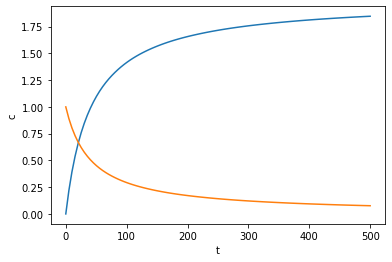

In [31]:
a = 0
b = 500
t = np.linspace(a,b,100)
y0 = [0,1,1] # Array med startverdier
y_int = solve_ivp(ratelover, [a,b], y0, t_eval=t)

plt.xlabel("t (s)")
plt.ylabel("c (mol/L)")
plt.plot(y_int.t, y_int.y[0]) # Plotter [HI]
plt.plot(y_int.t, y_int.y[1]) # Plotter [H2]
plt.show()

## Oppgaver

```{admonition} Oppgave
:class: tip
Implementer Eulers metode som en Python-funksjon, og løs differensiallikningen $y' = y$ med initialbetingelsen $y(0) = 2$. Løs den samme likningen med ulike løsninger fra scipy-biblioteket og sammenlikn resultatene.
```

```{admonition} Oppgave
:class: tip
Ta en generell irreversibel reaksjon $A + B \rightarrow 2C$ som følger rateloven $\frac{dC}{dt} = k[A][B]$. Vi starter med 1.00 mol/L av hver av reaktantene, og 0 mol/L av produktet. Ratekonstanten k = 0.01 s$^{-1}$.
Lag et program som simulerer utviklingen de 500 første sekundene.
```

```{admonition} Oppgave
:class: tip
Løs puslespillet nedenfor.
```

In [1]:
from IPython.display import IFrame
IFrame('https://parsons.herokuapp.com/puzzle/67c135760a964287b3dfa83e658cfd00', width=1000, height=550)

## Videoer

````{tabbed} Differensiallikninger
<iframe width="850" height="450" src="https://www.youtube.com/embed/O08ToTAqp5w" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
````

````{tabbed} Fartslover (ratelover)
<iframe width="850" height="450" src="https://www.youtube.com/embed/Ql-68OsKDaQ" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
````